# Voyage of the Data Ship

Our task is to plot the 10 given FITS (Flexible Image Transport System) files transmitted by the data ship back to Earth after its long voyage across the vastness of space.

We will first plot these FITS files, and then explain the cosmic phenomenon observed in these files captured by the data ship.

In [1]:
#importing necessary libraries

import numpy as np
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt

In [2]:
#Loading the fits files 

mainDir = '../Data/Fits_Files/'

q1 = fits.open(mainDir + 'q1.fits')
q2 = fits.open(mainDir + 'q2.fits')
q3 = fits.open(mainDir + 'q3.fits')
q4 = fits.open(mainDir + 'q4.fits')
q5 = fits.open(mainDir + 'q5.fits')
q6 = fits.open(mainDir + 'q6.fits')
q7 = fits.open(mainDir + 'q7.fits')
q8 = fits.open(mainDir + 'q8.fits')
q9 = fits.open(mainDir + 'q9.fits')
q10 = fits.open(mainDir + 'q10.fits')

In [3]:
print(q1, q2, q3,q4, q5, q6, q7, q8, q9, q10)

#All files clearly only contain primary HDUs

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBD0D70>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA8B90>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA8CD0>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA8F50>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA9090>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA91D0>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA9310>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA9450>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA9590>] [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001759BBA96D0>]


In [4]:
#Let's examine their primary HDU headers

#q10[0].header

#Examining the different headers, we find no useful information, but the fits files were written by skyview which is pretty interesting

In [5]:
#Examining their datas

q10[0].data

#These all seem to be image data's so let's store them to visualize them

array([[3639., 3639., 3453., ..., 3325., 6659., 6659.],
       [3083., 3083., 3083., ..., 3325., 6659., 6659.],
       [3083., 3083., 3083., ..., 3880., 6474., 6474.],
       ...,
       [2861., 3024., 3024., ..., 3329., 3329., 2958.],
       [2861., 3024., 3024., ..., 3121., 3121., 3121.],
       [2861., 3024., 3024., ..., 3121., 3121., 3121.]], dtype='>f8')

In [6]:
#Let's get their image datas to work on them then

q1Data = q1[0].data
q2Data = q2[0].data
q3Data = q3[0].data
q4Data = q4[0].data
q5Data = q5[0].data
q6Data = q6[0].data
q7Data = q7[0].data
q8Data = q8[0].data
q9Data = q9[0].data
q10Data = q10[0].data

#### Now let's start our actual project and tackle the questions one at a time

We will first make an initial plot of our image data, then try to make it look better using various pixel scaling methods and stuff, and we will get a final output image and save it in our plotted files folder.

We will also update a document describing the cosmic phenomenon observed in the image file.

## Q1

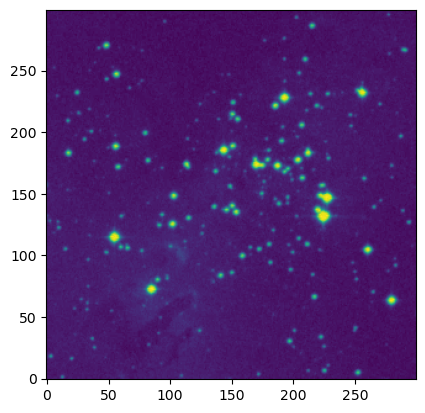

In [7]:
# Let's make an initial plot of q1

plt.imshow(q1Data, origin = 'lower')

plt.show()

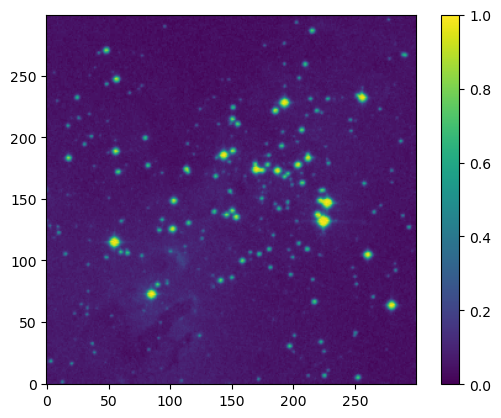

In [8]:
# Interesting inital plot, but let's try scaling methods to make it look better and add a colorbar

def MinMax(imgData):
    return (imgData - imgData.min())/(imgData.max() - imgData.min())

q1MinMax = MinMax(q1Data)
plt.imshow(q1MinMax, origin = 'lower')
plt.colorbar()
plt.show()

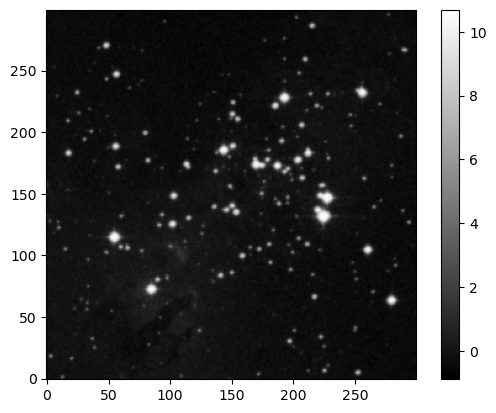

In [9]:
# Doesn't seem to be much better, firstly let's change colormap to grayscale as it would suit the image better, also let's try Z Scaling

def ZScaling(imgData):
    return (imgData - imgData.mean())/imgData.std()

q1Z = ZScaling(q1Data)

plt.imshow(q1Z, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

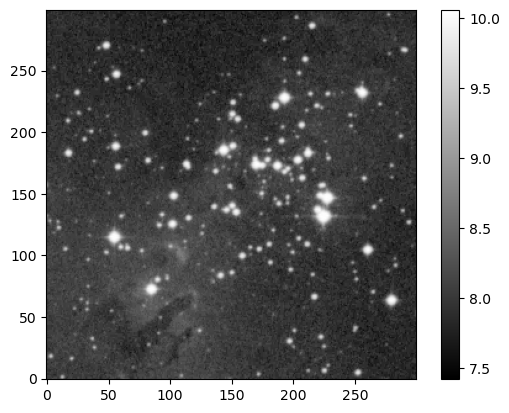

In [10]:
#Still looks quite blurry, let us try log scaling

def LogScaling(imgData):
    return np.log(imgData)

q1Log = LogScaling(q1Data)

plt.imshow(q1Log, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

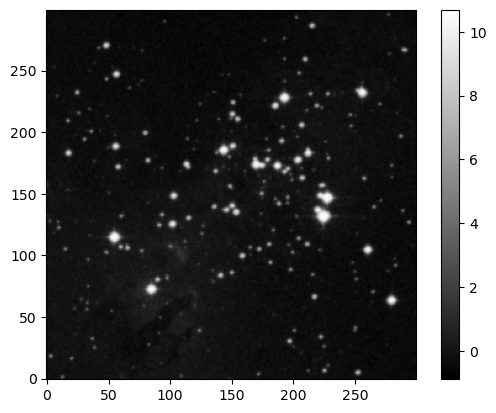

In [11]:
# That looks better, but also maybe a bit too much? Let's try square root scaling

def SqrtScaling(imgData):
    return np.sqrt(imgData)

q1Sqrt = SqrtScaling(q1Data)

plt.imshow(q1Z, origin = 'lower', cmap = 'gray')
plt.colorbar()
plt.show()

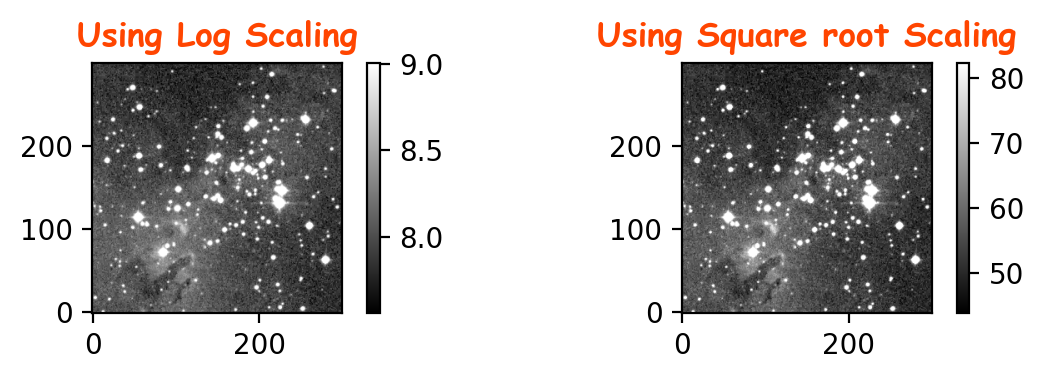

In [12]:
#In my opinion, Square root scaling/streteching seems best, but let's try ZScaleInterval on both log and square root scaled image to compare

zscale = ZScaleInterval()
vminL, vmaxL = zscale.get_limits(q1Log)
vminS, vmaxS = zscale.get_limits(q1Sqrt)

titleFont = {'color': 'orangered', 'weight': 'bold', 'name': 'Comic Sans MS'}

def Compare2Scalings(imgData1, scaling1, imgData2, scaling2, vmin1, vmax1, vmin2, vmax2, Cmap = 'gray'):
 plt.figure(figsize = (6, 2), dpi = 200)

 plt.subplot(1, 2, 1)
 plt.title(f"Using {scaling1} Scaling", fontdict = titleFont, size = 12)
 plt.imshow(imgData1, origin = 'lower', cmap = Cmap, vmin = vmin1, vmax = vmax1)
 plt.colorbar()

 plt.subplot(1, 2, 2)
 plt.title(f"Using {scaling2} Scaling", fontdict =  titleFont, size = 12)
 plt.imshow(imgData2, origin = 'lower', cmap = Cmap, vmin = vmin2, vmax = vmax2)
 plt.colorbar()

 plt.tight_layout()
 plt.show()

Compare2Scalings(q1Log, 'Log', q1Sqrt, 'Square root', vminL, vmaxL, vminS, vmaxS)

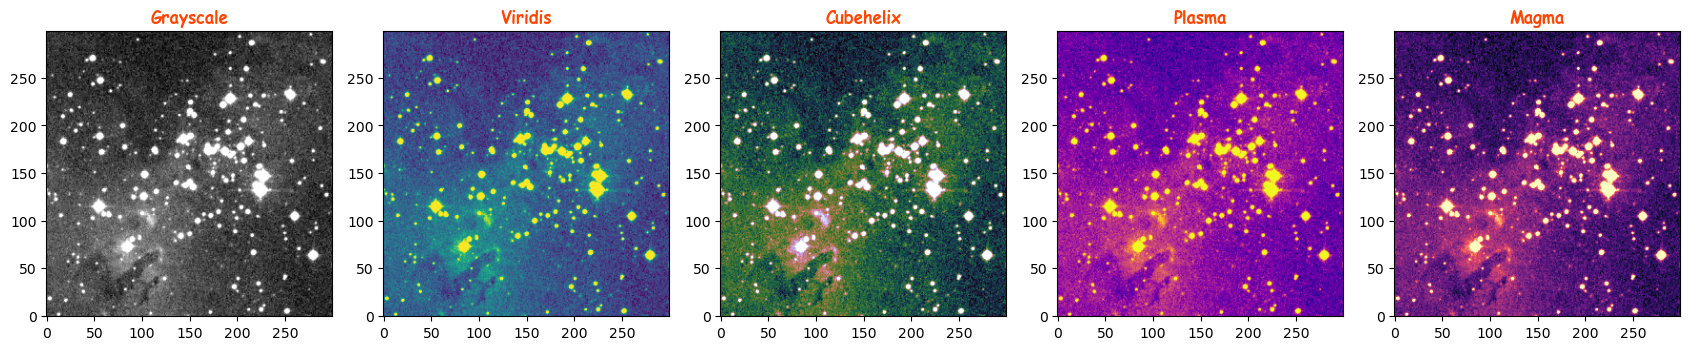

In [13]:
# Square root scaling still looks best, but let's compare different colormaps to see which one looks best

def CompareCmap(imgData, vmin, vmax):
 plt.figure(figsize = (17,5), dpi = 100)

 plt.subplot(1, 5, 1)
 plt.title("Grayscale", fontdict = titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = 'gray', vmin = vmin, vmax = vmax)

 plt.subplot(1, 5, 2)
 plt.title("Viridis", fontdict = titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = 'viridis', vmin = vmin, vmax = vmax)

 plt.subplot(1, 5, 3)
 plt.title("Cubehelix", fontdict = titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = 'cubehelix', vmin = vmin, vmax = vmax)

 plt.subplot(1, 5, 4)
 plt.title("Plasma", fontdict = titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = 'plasma', vmin = vmin, vmax = vmax)

 plt.subplot(1, 5, 5)
 plt.title("Magma", fontdict = titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = 'magma', vmin = vmin, vmax = vmax)

 plt.tight_layout()
 plt.show()

CompareCmap(q1Sqrt, vminS, vmaxS)

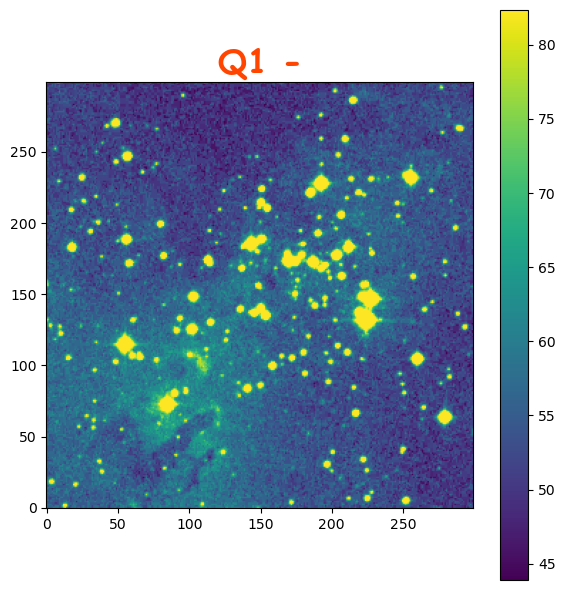

In [14]:
#Viridis/Magma looks best to me but let's choose Viridis for the final image

saveDir = "./AstroGoodBoy_plotted_fits_files/"

def Output(imgData, vmin, vmax, filename, title, Cmap = 'gray'):
 plt.figure(figsize = (6, 6,), dpi = 100)
 plt.title(title, fontdict = titleFont, size = 24)
 plt.imshow(imgData, origin = 'lower', vmin = vmin, vmax = vmax, cmap = Cmap)
 plt.colorbar()
 plt.savefig(saveDir + filename + '.jpeg', dpi = 300)
 plt.tight_layout()
 plt.show()

Output(q1Sqrt, vminS, vmaxS, 'q1', 'Q1 -', 'viridis')

(insert explanation of above image here)

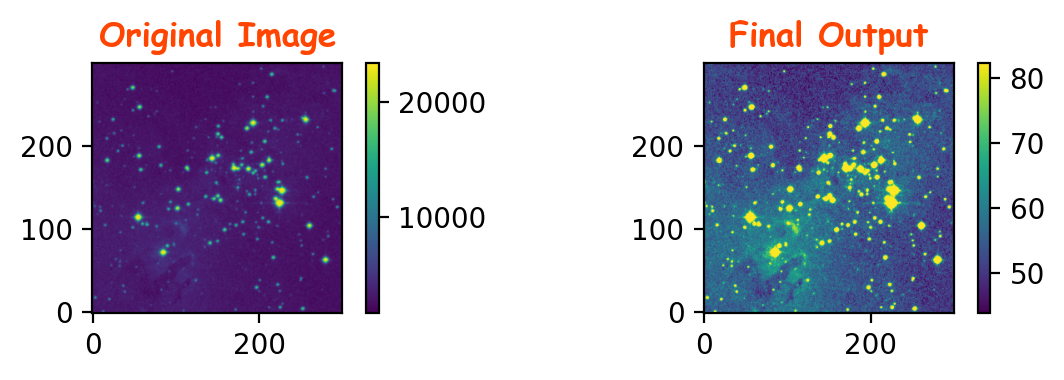

In [27]:
# Let's compare to original image to see our improvement

def Compare2Original(imgOriginal, imgData, vmin, vmax, Cmap = 'gray'):
 plt.figure(figsize = (6, 2), dpi = 200)

 plt.subplot(1, 2, 1)
 plt.title("Original Image", fontdict = titleFont, size = 12)
 plt.imshow(imgOriginal, origin = 'lower', cmap = Cmap)
 plt.colorbar()

 plt.subplot(1, 2, 2)
 plt.title("Final Output", fontdict =  titleFont, size = 12)
 plt.imshow(imgData, origin = 'lower', cmap = Cmap, vmin = vmin, vmax = vmax)
 plt.colorbar()

 plt.tight_layout()
 plt.show()

Compare2Original(q1Data, q1Sqrt, vminS, vmaxS, Cmap = 'viridis')

## Q2

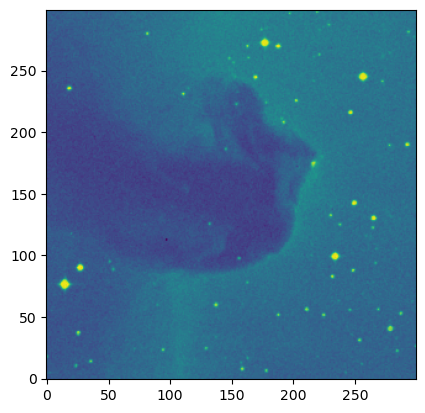

In [15]:
# Now let's plot q2

plt.imshow(q2Data, origin = 'lower')

plt.show()

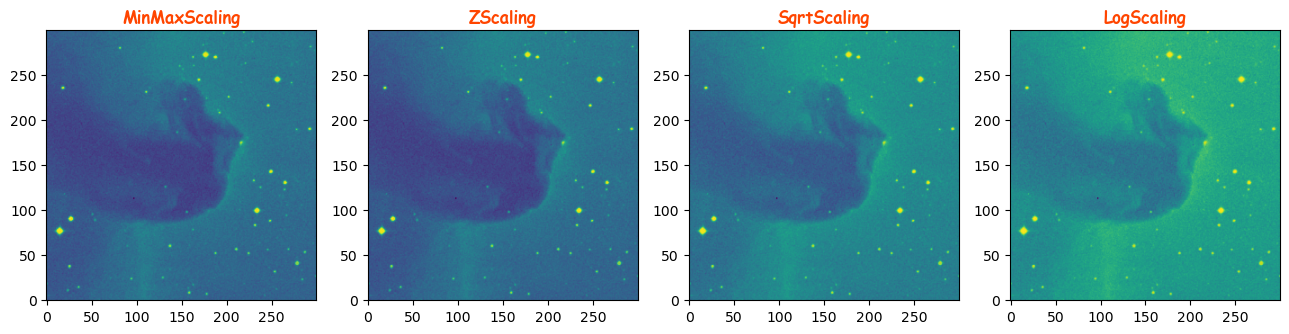

In [16]:
#Comparing different scaling methods

def CompareScalings(imgData):
 plt.figure(figsize = (13, 5), dpi = 100)

 plt.subplot(1, 4, 1)
 plt.title("MinMaxScaling", fontdict = titleFont, size = 12)
 plt.imshow(MinMax(imgData), origin = 'lower')

 plt.subplot(1, 4, 2)
 plt.title("ZScaling", fontdict = titleFont, size = 12)
 plt.imshow(ZScaling(imgData), origin = 'lower')

 plt.subplot(1, 4, 3)
 plt.title("SqrtScaling", fontdict = titleFont, size = 12)
 plt.imshow(SqrtScaling(imgData), origin = 'lower')

 plt.subplot(1, 4, 4)
 plt.title("LogScaling", fontdict = titleFont, size = 12)
 plt.imshow(LogScaling(imgData), origin = 'lower')

 plt.tight_layout()
 plt.show()

CompareScalings(q2Data)

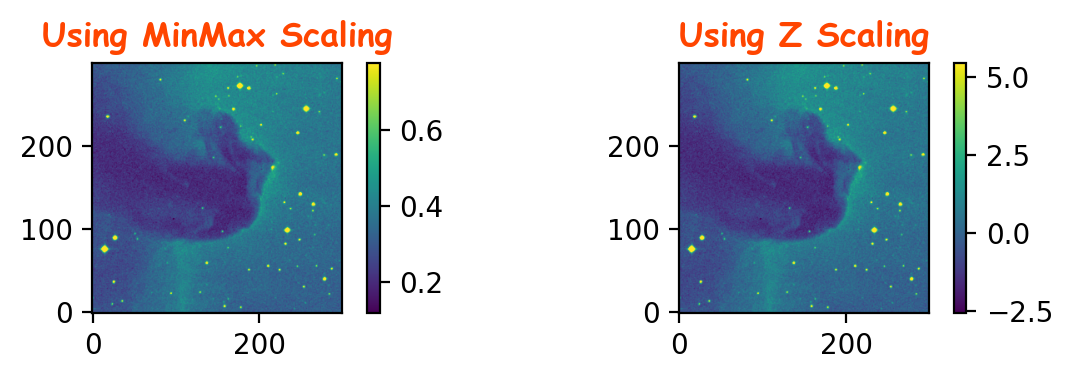

In [17]:
#Either MinMax Scaling or ZScaling looks best here, let's use ZScaleInterval and then compare final 2 results to choose one

vminM, vmaxM = zscale.get_limits(MinMax(q2Data))
vminZ, vmaxZ = zscale.get_limits(ZScaling(q2Data))

Compare2Scalings(MinMax(q2Data), 'MinMax', ZScaling(q2Data), 'Z', vminM, vmaxM, vminZ, vmaxZ, Cmap = 'viridis')

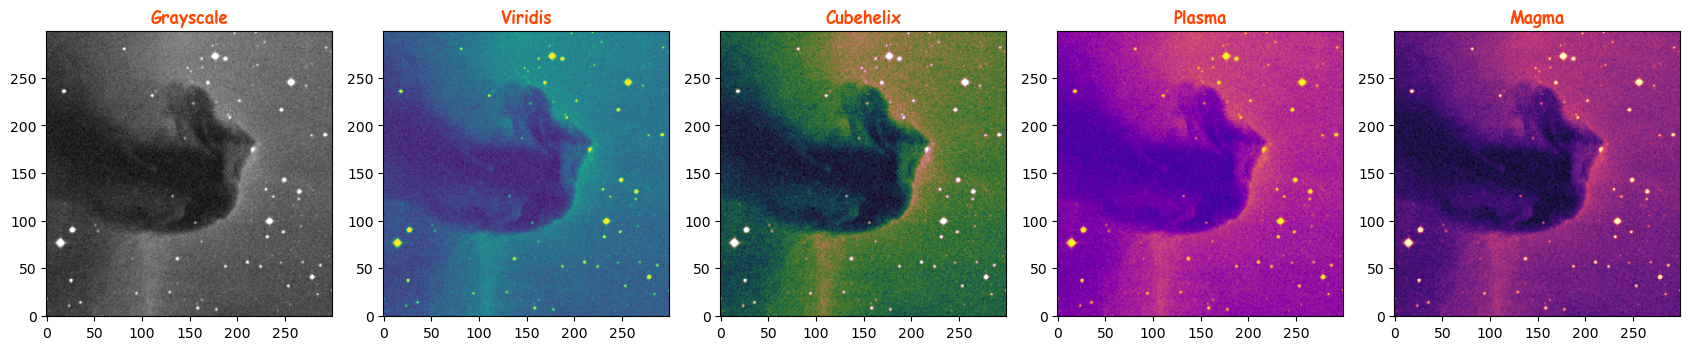

In [18]:
#There is not much visible difference here, I'd just choose the ZScaling output, let's now compare Cmaps

CompareCmap(ZScaling(q2Data), vminZ, vmaxZ)

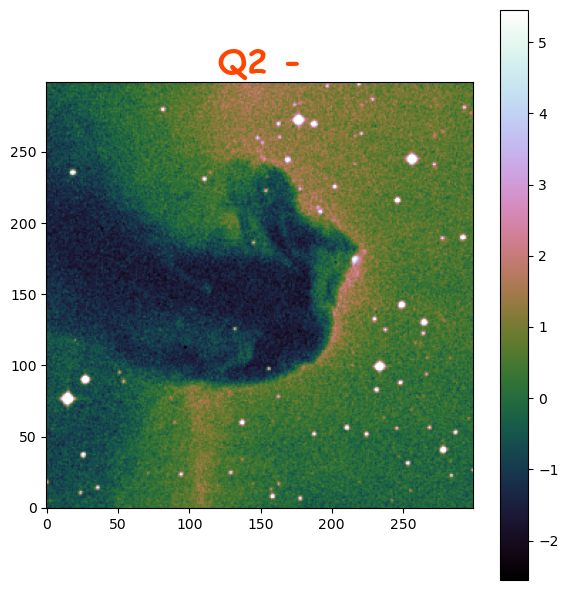

In [23]:
#I like the cubehelix one most, let's make final output now 

Output(ZScaling(q2Data), vminZ, vmaxZ, 'q2', 'Q2 -', 'cubehelix')

(insert q2 explanation here)

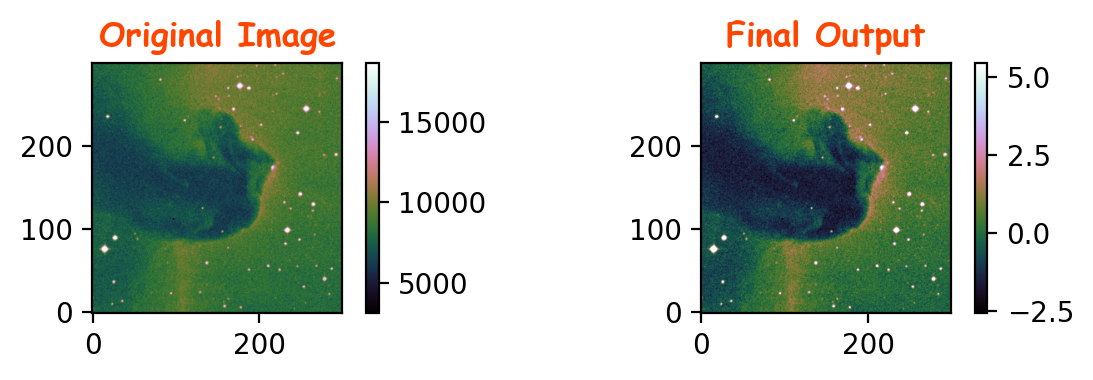

In [28]:
#Let's compare to original

Compare2Original(q2Data, ZScaling(q2Data), vminZ, vmaxZ, Cmap = 'cubehelix')

## Q3